# Ejercicio 2

## Dataset

En primer lugar, se importan los datos del archivo de abalones e inspeccionamos rápidamente los datos.

In [1]:
import pandas as pd
abalones = pd.read_csv("../data/abalones.csv")

print(abalones)

     Gender  Length  Diameter  Height  Full Size  Meat Weight  Viscera Weight  \
0         M   0.455     0.365   0.095     0.5140       0.2245          0.1010   
1         M   0.350     0.265   0.090     0.2255       0.0995          0.0485   
2         F   0.530     0.420   0.135     0.6770       0.2565          0.1415   
3         M   0.440     0.365   0.125     0.5160       0.2155          0.1140   
4         I   0.330     0.255   0.080     0.2050       0.0895          0.0395   
...     ...     ...       ...     ...        ...          ...             ...   
4172      F   0.565     0.450   0.165     0.8870       0.3700          0.2390   
4173      M   0.590     0.440   0.135     0.9660       0.4390          0.2145   
4174      M   0.600     0.475   0.205     1.1760       0.5255          0.2875   
4175      F   0.625     0.485   0.150     1.0945       0.5310          0.2610   
4176      M   0.710     0.555   0.195     1.9485       0.9455          0.3765   

      Shell Weight  Rings  

El data frame consiste de 9 _features_ y 4177 muestras. 

## Training & Testing Sets

Antes de ajustar el modelo, es necesario separar los datos en un _training set_ y un _testing set_.

In [92]:
from sklearn.model_selection import train_test_split

y = abalones["Gender"].to_numpy()
X = abalones[["Full Size", "Rings", "Length"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Training set size: %d samples" % X_train.shape[0])
print("Testing set size: %d samples" % X_test.shape[0])

Training set size: 2798 samples
Testing set size: 1379 samples


## Ajuste

Dicho esto se procede a calcular la regresión logísitica sobre la variable de respuesta `Gender` en base a las siguientes variables exploratorias.

- `Length`
- `Full Size`
- `Rings`
- `Length`, `Full Size`, `Rings`

### Ajuste en base a la longitud

In [173]:
from sklearn.linear_model import LogisticRegression

length_train = X_train[:,2].reshape(-1, 1)
length_test = X_test[:,2].reshape(-1, 1)

# Logistic regression based on length
classifier = LogisticRegression().fit(length_train, y_train)

Una vez obtenido el modelo se calcula la matriz de confusión y otras métricas.

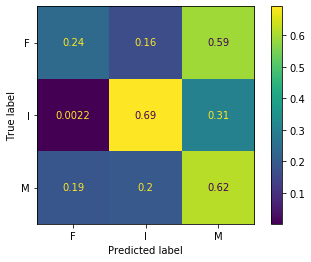

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

class_names = ["F", "I", "M"]

y_pred = classifier.predict(length_test)

plot_confusion_matrix(classifier, length_test, y_test,
                      display_labels=class_names,
                      normalize="true")
plt.show()

In [175]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print("Accuracy: %f" % accuracy_score(y_test, y_pred, normalize=True))
print("Precision: %f" % precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.527919
Precision: 0.537754
Recall: 0.517086


### Ajuste basado en el peso total

In [176]:
from sklearn.linear_model import LogisticRegression

full_size_train = X_train[:,0].reshape(-1, 1)
full_size_test = X_test[:,0].reshape(-1, 1)

# Logistic regression based on length
classifier = LogisticRegression().fit(full_size_train, y_train)

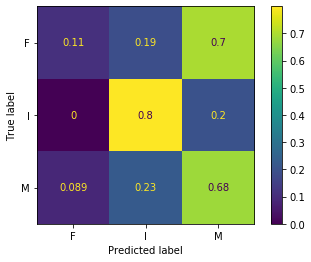

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

class_names = ["F", "I", "M"]

y_pred = classifier.predict(full_size_test)

plot_confusion_matrix(classifier, full_size_test, y_test,
                      display_labels=class_names,
                      normalize="true")
plt.show()

In [178]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred, normalize=True))
print("Precision: %f" % precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.547498
Precision: 0.543164
Recall: 0.531046


### Ajuste basado en el anillos

In [194]:
from sklearn.linear_model import LogisticRegression

rings_train = X_train[:,1].reshape(-1, 1)
rings_test = X_test[:,1].reshape(-1, 1)

# Logistic regression based on length
classifier = LogisticRegression().fit(rings_train, y_train)

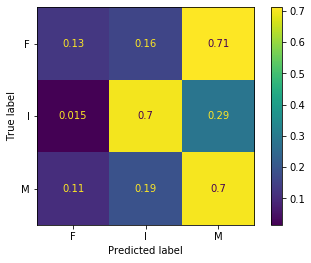

In [195]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

class_names = ["F", "I", "M"]

y_pred = classifier.predict(rings_test)

plot_confusion_matrix(classifier, rings_test, y_test,
                      display_labels=class_names,
                      normalize="true")
plt.show()

In [196]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred, normalize=True))
print("Precision: %f" % precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.526468
Precision: 0.527331
Recall: 0.509566


### Ajuste en base a las tres variables

In [197]:
from sklearn.linear_model import LogisticRegression

# Logistic regression based on length
classifier = LogisticRegression().fit(X_train, y_train)

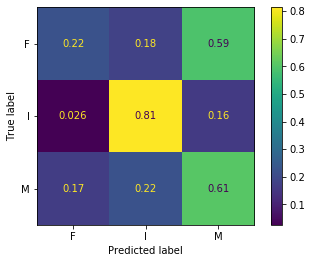

In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

class_names = ["F", "I", "M"]

y_pred = classifier.predict(X_test)

plot_confusion_matrix(classifier, X_test, y_test,
                      display_labels=class_names,
                      normalize="true")
plt.show()

In [199]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred, normalize=True))
print("Precision: %f" % precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.559101
Precision: 0.547442
Recall: 0.548605
